###### Cleaning raw data

In [68]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import randn
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df=pd.read_csv('lebron_career.csv')

In [3]:
df.head()

,game,date,age,team,opp,result,mp,fg,fga,fgp,...,orb,drb,trb,ast,stl,blk,tov,pts,game_score,minus_plus
0,1,2003-10-29,18-303,CLE,SAC,L (-14),42:00,12,20,0.600,...,2,4,6,9,4,0,2,25,24.7,-9
1,2,2003-10-30,18-304,CLE,PHO,L (-9),41:00,8,17,0.471,...,2,10,12,8,1,0,7,21,14.7,-3
2,3,2003-11-01,18-306,CLE,POR,L (-19),39:00,3,12,0.250,...,0,4,4,6,2,0,2,8,5.0,-21
3,4,2003-11-05,18-310,CLE,DEN,L (-4),41:00,3,11,0.273,...,2,9,11,7,2,3,2,7,11.2,-3
4,5,2003-11-07,18-312,CLE,IND,L (-1),44:00,8,18,0.444,...,0,5,5,3,0,0,7,23,9.0,-7


In [4]:
df.shape

(1132, 26)

In [69]:
df.drop('game', axis=1)
df.date=pd.to_datetime(df['date'])
df['mp'] = df['mp'].astype(str)
df['mp'] = df['mp'].str.replace(':','.')
df['mp'] = df['mp'].astype(float)
df['age'] = df['age'].astype(str)
df['age'] = df['age'].str.replace('-','.')
df['age'] = df['age'].astype(float)
df['result'] = df['result'].str[:1]

In [70]:
df.head()

,game,date,age,team,opp,result,mp,fg,fga,fgp,...,orb,drb,trb,ast,stl,blk,tov,pts,game_score,minus_plus
0,1,2003-10-29,18.303,CLE,SAC,L,42.0,12,20,0.600,...,2,4,6,9,4,0,2,25,24.7,-9
1,2,2003-10-30,18.304,CLE,PHO,L,41.0,8,17,0.471,...,2,10,12,8,1,0,7,21,14.7,-3
2,3,2003-11-01,18.306,CLE,POR,L,39.0,3,12,0.250,...,0,4,4,6,2,0,2,8,5.0,-21
3,4,2003-11-05,18.310,CLE,DEN,L,41.0,3,11,0.273,...,2,9,11,7,2,3,2,7,11.2,-3
4,5,2003-11-07,18.312,CLE,IND,L,44.0,8,18,0.444,...,0,5,5,3,0,0,7,23,9.0,-7


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132 entries, 0 to 1131
Data columns (total 26 columns):
game          1132 non-null int64
date          1132 non-null datetime64[ns]
age           1132 non-null object
team          1132 non-null object
opp           1132 non-null object
result        1132 non-null object
mp            1132 non-null object
fg            1132 non-null int64
fga           1132 non-null int64
fgp           1132 non-null float64
three         1132 non-null int64
threeatt      1132 non-null int64
threep        1092 non-null float64
ft            1132 non-null int64
fta           1132 non-null int64
ftp           1120 non-null float64
orb           1132 non-null int64
drb           1132 non-null int64
trb           1132 non-null int64
ast           1132 non-null int64
stl           1132 non-null int64
blk           1132 non-null int64
tov           1132 non-null int64
pts           1132 non-null int64
game_score    1132 non-null float64
minus_plus    1132 no

In [8]:
df.describe()

,game,fg,fga,fgp,three,threeatt,threep,ft,fta,ftp,orb,drb,trb,ast,stl,blk,tov,pts,game_score,minus_plus
count,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1092.000000,1132.000000,1132.000000,1120.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000
mean,38.385159,9.866608,19.585689,0.505467,1.409894,4.103357,0.309266,6.005300,8.126325,0.734154,1.212898,6.136926,7.349823,7.163428,1.640459,0.782686,3.463781,27.148410,22.224735,5.467314
std,22.038108,3.099422,4.868082,0.114112,1.396538,2.346039,0.253228,3.449518,4.220171,0.185503,1.184072,2.684365,3.004192,2.880583,1.313962,0.924440,1.834321,7.887419,7.790812,12.712345
min,1.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,-0.100000,-39.000000
25%,19.000000,8.000000,16.000000,0.429000,0.000000,2.000000,0.000000,4.000000,5.000000,0.625000,0.000000,4.000000,5.000000,5.000000,1.000000,0.000000,2.000000,22.000000,17.000000,-3.000000
50%,38.000000,10.000000,20.000000,0.500000,1.000000,4.000000,0.333000,6.000000,8.000000,0.750000,1.000000,6.000000,7.000000,7.000000,1.000000,1.000000,3.000000,27.000000,22.600000,6.000000
75%,57.000000,12.000000,23.000000,0.579000,2.000000,5.000000,0.500000,8.000000,11.000000,0.857000,2.000000,8.000000,9.000000,9.000000,2.000000,1.000000,5.000000,32.000000,27.200000,14.000000
max,81.000000,23.000000,36.000000,0.929000,8.000000,13.000000,1.000000,24.000000,28.000000,1.000000,7.000000,17.000000,19.000000,19.000000,7.000000,5.000000,11.000000,61.000000,53.200000,39.000000


##### Creating X feat and y 

In [71]:
x_feats = ['age', 'mp', 'fgp', 'threep', 'ftp', 'fta', 'team', 'trb', 'ast', 'stl', 'blk', 'tov', 'pts', 'game_score', 'minus_plus']
X = pd.get_dummies(df[x_feats], drop_first=True)
# y= df.result

X.head() 

,age,mp,fgp,threep,ftp,fta,trb,ast,stl,blk,tov,pts,game_score,minus_plus,team_MIA
0,18.303,42.0,0.600,0.0,0.333,3,6,9,4,0,2,25,24.7,-9,0
1,18.304,41.0,0.471,0.2,0.571,7,12,8,1,0,7,21,14.7,-3,0
2,18.306,39.0,0.250,0.0,1.000,2,4,6,2,0,2,8,5.0,-21,0
3,18.310,41.0,0.273,0.0,1.000,1,11,7,2,3,2,7,11.2,-3,0
4,18.312,44.0,0.444,0.5,0.857,7,5,3,0,0,7,23,9.0,-7,0


In [72]:
y= pd.get_dummies(df['result'], drop_first=True)

In [19]:
y.tail()

,W
1127,1
1128,0
1129,1
1130,1
1131,1


In [73]:
y['W'] = y['W'].astype(int)

In [18]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132 entries, 0 to 1131
Data columns (total 1 columns):
W    1132 non-null int64
dtypes: int64(1)
memory usage: 8.9 KB


### Graphs for EDA 

In [136]:
graph_feats = ['age', 'mp', 'fgp', 'threep', 'ftp', 'fta', 'team', 'trb', 'ast', 'stl', 'blk', 'tov', 'pts', 'game_score', 'minus_plus', 'result']
graphing = pd.get_dummies(df[graph_feats], drop_first=True)
# y= df.result

graphing.head() 

,age,mp,fgp,threep,ftp,fta,trb,ast,stl,blk,tov,pts,game_score,minus_plus,team_MIA,result_W
0,18.303,42.0,0.600,0.0,0.333,3,6,9,4,0,2,25,24.7,-9,0,0
1,18.304,41.0,0.471,0.2,0.571,7,12,8,1,0,7,21,14.7,-3,0,0
2,18.306,39.0,0.250,0.0,1.000,2,4,6,2,0,2,8,5.0,-21,0,0
3,18.310,41.0,0.273,0.0,1.000,1,11,7,2,3,2,7,11.2,-3,0,0
4,18.312,44.0,0.444,0.5,0.857,7,5,3,0,0,7,23,9.0,-7,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a17d070b8>]],
      dtype=object)

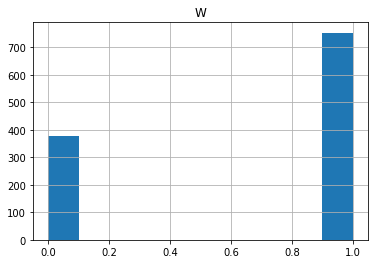

In [19]:
y.hist()


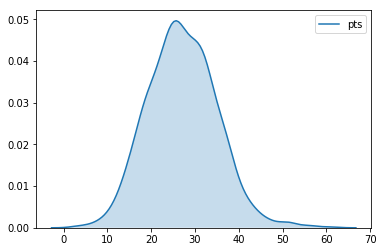

In [23]:
sns.kdeplot(X['pts'], shade=True)

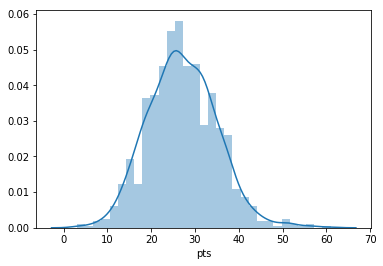

In [24]:
sns.distplot(X['pts'])


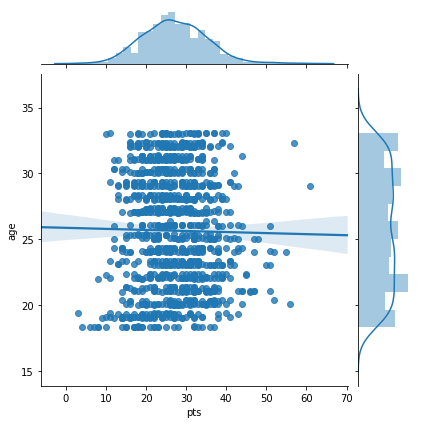

In [25]:
sns.jointplot("pts", "age", data=df, kind='reg');


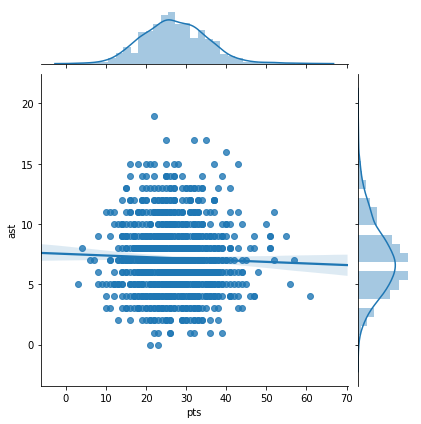

In [26]:
sns.jointplot("pts", "ast", data=df, kind='reg');



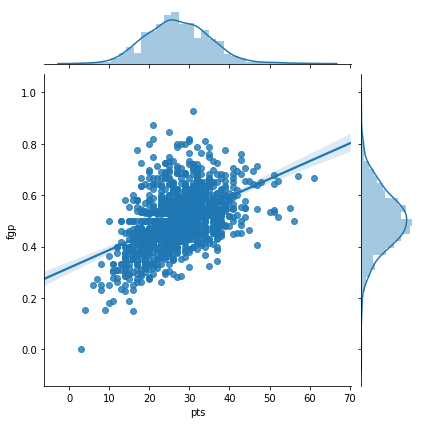

In [27]:
sns.jointplot("pts", "fgp", data=df, kind='reg');



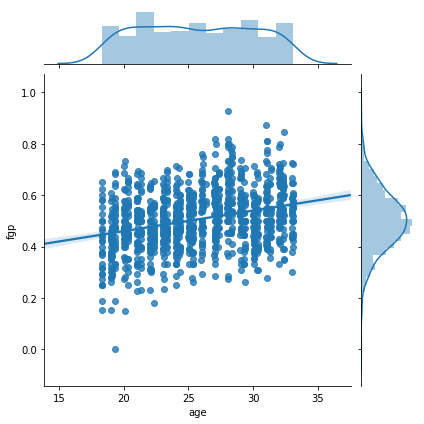

In [28]:
sns.jointplot("age", 'fgp', data=df, kind='reg');



In [74]:
df.fillna(value=0)

,game,date,age,team,opp,result,mp,fg,fga,fgp,...,orb,drb,trb,ast,stl,blk,tov,pts,game_score,minus_plus
0,1,2003-10-29,18.303,CLE,SAC,L,42.00,12,20,0.600,...,2,4,6,9,4,0,2,25,24.7,-9
1,2,2003-10-30,18.304,CLE,PHO,L,41.00,8,17,0.471,...,2,10,12,8,1,0,7,21,14.7,-3
2,3,2003-11-01,18.306,CLE,POR,L,39.00,3,12,0.250,...,0,4,4,6,2,0,2,8,5.0,-21
3,4,2003-11-05,18.310,CLE,DEN,L,41.00,3,11,0.273,...,2,9,11,7,2,3,2,7,11.2,-3
4,5,2003-11-07,18.312,CLE,IND,L,44.00,8,18,0.444,...,0,5,5,3,0,0,7,23,9.0,-7
5,6,2003-11-08,18.313,CLE,WAS,W,45.00,8,19,0.421,...,5,3,8,9,1,1,2,17,15.7,14
6,7,2003-11-10,18.315,CLE,NYK,W,34.00,7,12,0.583,...,1,4,5,4,1,1,2,17,15.8,20
7,8,2003-11-12,18.317,CLE,MIA,L,42.00,6,15,0.400,...,1,2,3,7,2,1,4,18,12.8,-4
8,9,2003-11-14,18.319,CLE,BOS,L,35.00,3,12,0.250,...,1,4,5,3,0,0,4,10,0.8,-1
9,10,2003-11-15,18.320,CLE,PHI,W,47.00,10,19,0.526,...,0,5,5,8,1,2,5,22,15.6,8


In [75]:
grouped=df.groupby(['result']).sum()

In [76]:
grouped.head()

,game,age,mp,fg,fga,fgp,three,threeatt,threep,ft,...,orb,drb,trb,ast,stl,blk,tov,pts,game_score,minus_plus
result,,,,,,,,,,,,,,,,,,,,,
L,14581,9438.997,15107.62,3577,7728,174.204,521,1694,102.389,2155,...,482,2148,2630,2418,555,264,1478,9830,7136.2,-2845
W,28871,19590.890,28611.16,7592,14443,397.985,1075,2951,235.330,4643,...,891,4799,5690,5691,1302,622,2443,20902,18022.2,9034


In [101]:
group2=df.groupby(['result']).sum()

In [102]:
group2.head()

,game,age,mp,fg,fga,fgp,three,threeatt,threep,ft,...,orb,drb,trb,ast,stl,blk,tov,pts,game_score,minus_plus
result,,,,,,,,,,,,,,,,,,,,,
L,14581,9438.997,15107.62,3577,7728,174.204,521,1694,102.389,2155,...,482,2148,2630,2418,555,264,1478,9830,7136.2,-2845
W,28871,19590.890,28611.16,7592,14443,397.985,1075,2951,235.330,4643,...,891,4799,5690,5691,1302,622,2443,20902,18022.2,9034


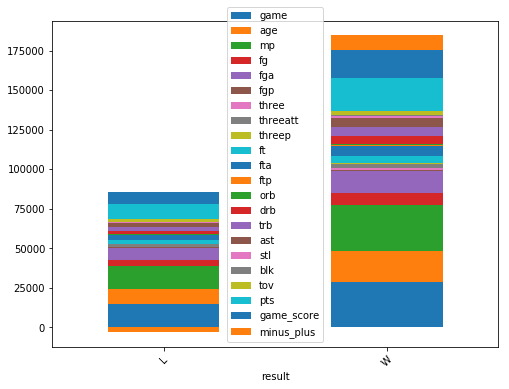

In [108]:
group2.plot(kind='bar', stacked='True', figsize=(8,6))
plt.legend(loc=0)
plt.xticks(rotation=45)
plt.show();

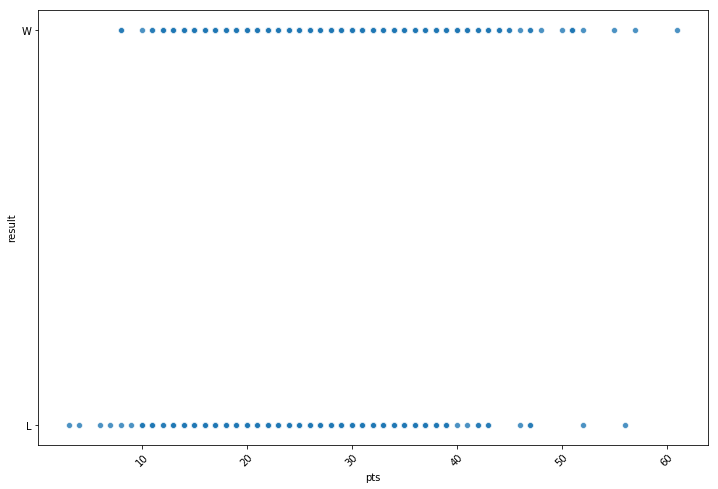

In [116]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='pts', y=[], data=df, alpha=.8)
plt.xticks(rotation=45)
plt.show();


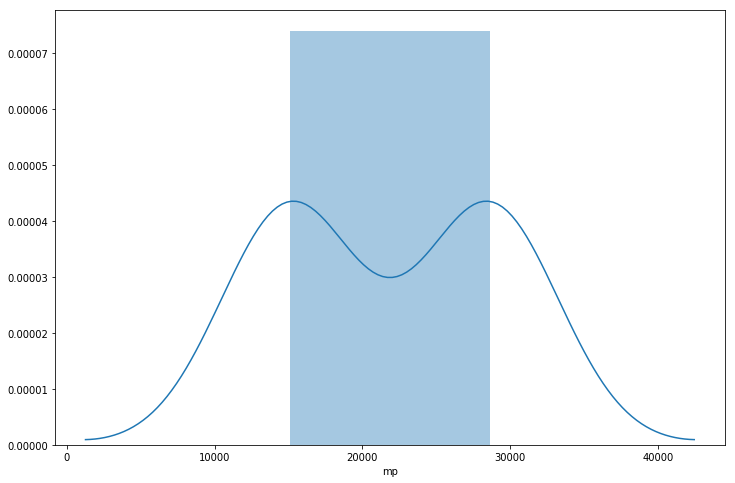

In [124]:
plt.figure(figsize=(12,8))
sns.distplot(grouped['mp']);

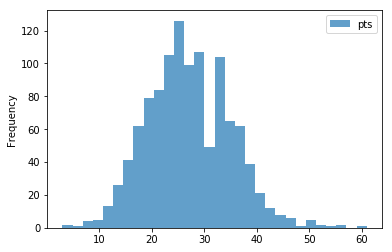

In [127]:
df.plot.hist(y=['pts'], bins=30, alpha=0.7)

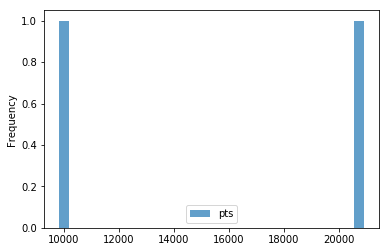

In [128]:
group2.plot.hist(y=['pts'], bins=30, alpha=0.7)

In [170]:
graphing.head()

,age,mp,fgp,threep,ftp,fta,trb,ast,stl,blk,tov,pts,game_score,minus_plus,team_MIA,result_W
0,18.303,42.0,0.600,0.0,0.333,3,6,9,4,0,2,25,24.7,-9,0,0
1,18.304,41.0,0.471,0.2,0.571,7,12,8,1,0,7,21,14.7,-3,0,0
2,18.306,39.0,0.250,0.0,1.000,2,4,6,2,0,2,8,5.0,-21,0,0
3,18.310,41.0,0.273,0.0,1.000,1,11,7,2,3,2,7,11.2,-3,0,0
4,18.312,44.0,0.444,0.5,0.857,7,5,3,0,0,7,23,9.0,-7,0,0


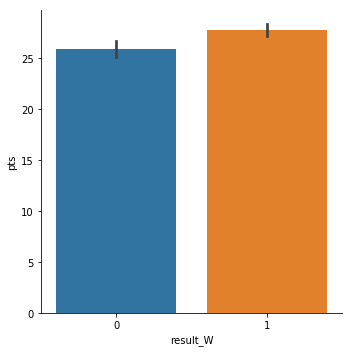

In [138]:
sns.catplot(x="result_W", y='pts', kind='bar',data=graphing)

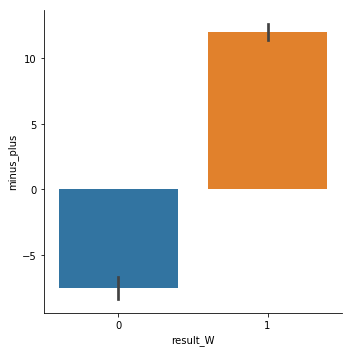

In [139]:
sns.catplot(x="result_W", y='minus_plus', kind='bar',data=graphing)

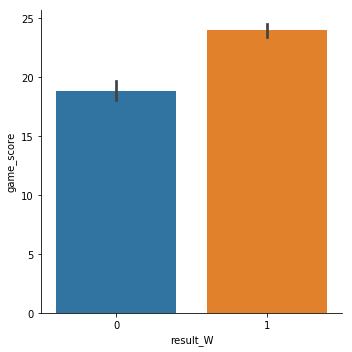

In [140]:
sns.catplot(x="result_W", y='game_score', kind='bar',data=graphing)

In [181]:
# try to count total up for features and then graph 
graphing2=graphing.groupby(['result_W']).sum()

In [182]:
graphing2.head()

,age,mp,fgp,threep,ftp,fta,trb,ast,stl,blk,tov,pts,game_score,minus_plus,team_MIA
result_W,,,,,,,,,,,,,,,
0,9438.997,15107.62,174.204,102.389,265.398,3022,2630,2418,555,264,1478,9830,7136.2,-2845,79
1,19590.890,28611.16,397.985,235.330,556.854,6177,5690,5691,1302,622,2443,20902,18022.2,9034,215


In [183]:
sns.catplot(x="result_W", y='pts', kind='bar',data=graphing2)

ValueError: Could not interpret input 'result_W'

#### Seperating Win/Loss (Target) into its own columns and then trying to Graph  

In [191]:
df.columns

Index(['game', 'date', 'age', 'team', 'opp', 'result', 'mp', 'fg', 'fga',
       'fgp', 'three', 'threeatt', 'threep', 'ft', 'fta', 'ftp', 'orb', 'drb',
       'trb', 'ast', 'stl', 'blk', 'tov', 'pts', 'game_score', 'minus_plus'],
      dtype='object')

In [ ]:
'game', 'date', 'age', 'team', 'opp', 'result', 'mp', 'fg', 'fga',
       'fgp', 'three', 'threeatt', 'threep', 'ft', 'fta', 'ftp', 'orb', 'drb',
       'trb', 'ast', 'stl', 'blk', 'tov', 'pts', 'game_score', 'minus_plus'

In [195]:
graph_feats2 = ['age', 'team', 'opp', 'result', 'mp', 'fg', 'fga',
       'fgp', 'three', 'threeatt', 'threep', 'ft', 'fta', 'ftp', 'orb', 'drb',
       'trb', 'ast', 'stl', 'blk', 'tov', 'pts', 'game_score', 'minus_plus']
graphinglast =pd.get_dummies(df[graph_feats2], drop_first=False)
# y= df.result

graphinglast.head() 

,age,mp,fg,fga,fgp,three,threeatt,threep,ft,fta,...,opp_PHO,opp_POR,opp_SAC,opp_SAS,opp_SEA,opp_TOR,opp_UTA,opp_WAS,result_L,result_W
0,18.303,42.0,12,20,0.600,0,2,0.0,1,3,...,0,0,1,0,0,0,0,0,1,0
1,18.304,41.0,8,17,0.471,1,5,0.2,4,7,...,1,0,0,0,0,0,0,0,1,0
2,18.306,39.0,3,12,0.250,0,1,0.0,2,2,...,0,1,0,0,0,0,0,0,1,0
3,18.310,41.0,3,11,0.273,0,2,0.0,1,1,...,0,0,0,0,0,0,0,0,1,0
4,18.312,44.0,8,18,0.444,1,2,0.5,6,7,...,0,0,0,0,0,0,0,0,1,0


#### totaling seperated columns and then graphing (Best results)

In [196]:
graphingtotal=graphinglast.groupby('result_L').sum()

In [197]:
graphingtotal.head()

,age,mp,fg,fga,fgp,three,threeatt,threep,ft,fta,...,opp_PHI,opp_PHO,opp_POR,opp_SAC,opp_SAS,opp_SEA,opp_TOR,opp_UTA,opp_WAS,result_W
result_L,,,,,,,,,,,,,,,,,,,,,
0,19590.890,28611.16,7592,14443,397.985,1075,2951,235.330,4643,6177,...,37.0,19.0,18.0,19.0,13.0,4.0,40.0,17.0,29.0,753.0
1,9438.997,15107.62,3577,7728,174.204,521,1694,102.389,2155,3022,...,10.0,9.0,9.0,7.0,14.0,4.0,10.0,12.0,18.0,0.0


In [ ]:
g = sns.pairplot(iris)
g.set(xticklabels=[])

In [ ]:
sns.set_style()

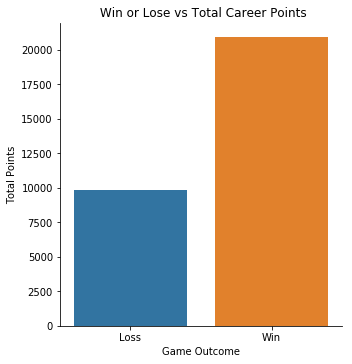

In [218]:
g=sns.catplot(x="result_W", y='pts', kind='bar',data=graphingtotal)
plt.title(" Win or Lose vs Total Career Points")
plt.ylabel("Total Points")
plt.xlabel("Game Outcome")
g.set(xticklabels=["Loss", "Win"])
# plt.xticklabels=[]

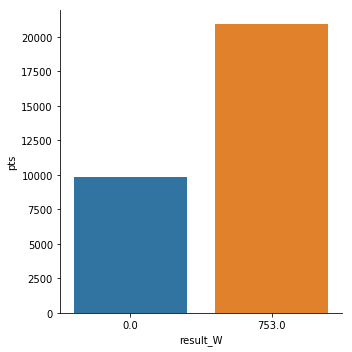

In [198]:
sns.catplot(x="result_W", y='pts', kind='bar',data=graphingtotal)

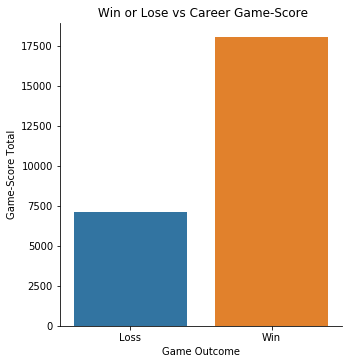

In [223]:
g=sns.catplot(x="result_W", y='game_score', kind='bar',data=graphingtotal)
plt.title(" Win or Lose vs Career Game-Score")
plt.ylabel("Game-Score Total")
plt.xlabel("Game Outcome")
g.set(xticklabels=["Loss", "Win"])
# plt.xticklabels=[]

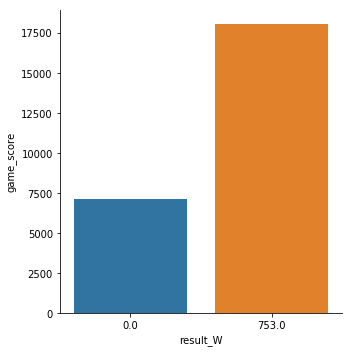

In [199]:
sns.catplot(x="result_W", y='game_score', kind='bar',data=graphingtotal)

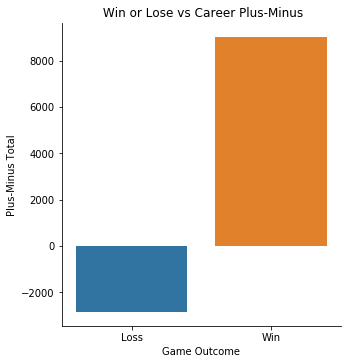

In [224]:
g=sns.catplot(x="result_W", y='minus_plus', kind='bar',data=graphingtotal)
plt.title(" Win or Lose vs Career Plus-Minus")
plt.ylabel("Plus-Minus Total")
plt.xlabel("Game Outcome")
g.set(xticklabels=["Loss", "Win"])

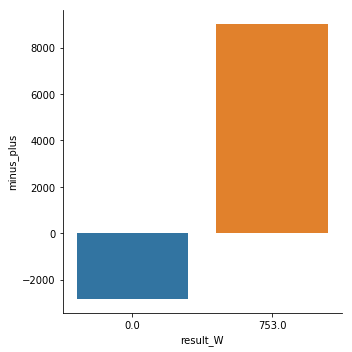

In [200]:
sns.catplot(x="result_W", y='minus_plus', kind='bar',data=graphingtotal)

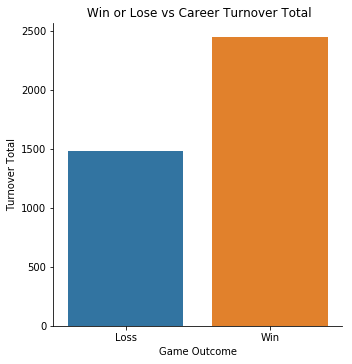

In [225]:
g=sns.catplot(x="result_W", y='tov', kind='bar',data=graphingtotal)
plt.title(" Win or Lose vs Career Turnover Total")
plt.ylabel("Turnover Total")
plt.xlabel("Game Outcome")
g.set(xticklabels=["Loss", "Win"])

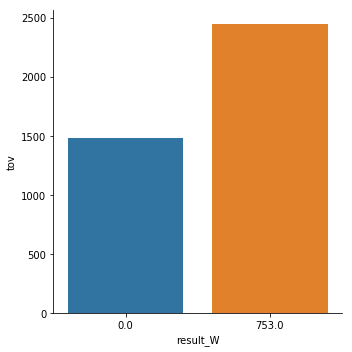

In [201]:
sns.catplot(x="result_W", y='tov', kind='bar',data=graphingtotal)

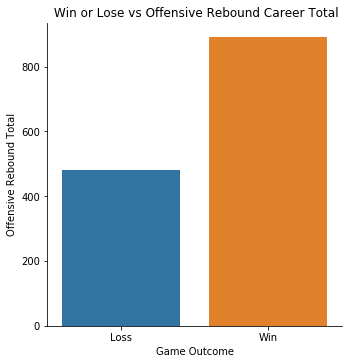

In [226]:
g=sns.catplot(x="result_W", y='orb', kind='bar',data=graphingtotal)
plt.title(" Win or Lose vs Offensive Rebound Career Total")
plt.ylabel("Offensive Rebound Total")
plt.xlabel("Game Outcome")
g.set(xticklabels=["Loss", "Win"])

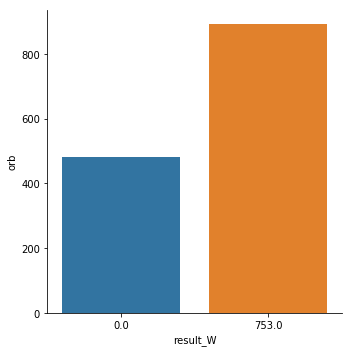

In [202]:
sns.catplot(x="result_W", y='orb', kind='bar',data=graphingtotal)

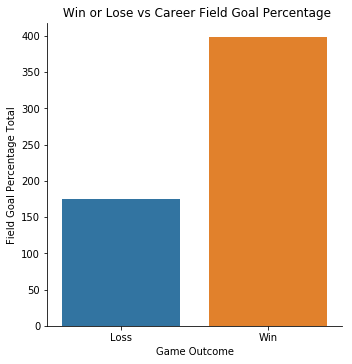

In [228]:
g=sns.catplot(x="result_W", y='fgp', kind='bar',data=graphingtotal)
plt.title(" Win or Lose vs Career Field Goal Percentage")
plt.ylabel("Field Goal Percentage Total")
plt.xlabel("Game Outcome")
g.set(xticklabels=["Loss", "Win"])

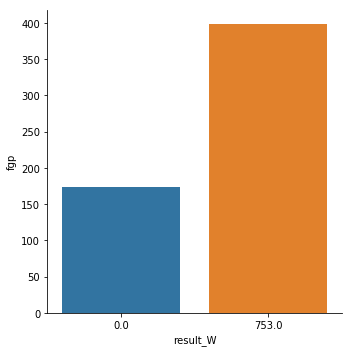

In [203]:
sns.catplot(x="result_W", y='fgp', kind='bar',data=graphingtotal)

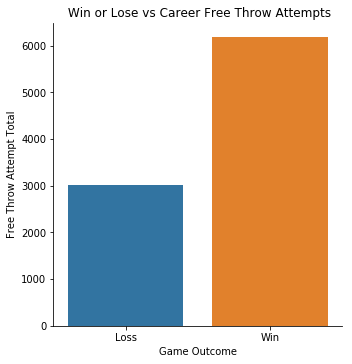

In [229]:
g=sns.catplot(x="result_W", y='fta', kind='bar',data=graphingtotal)
plt.title(" Win or Lose vs Career Free Throw Attempts")
plt.ylabel("Free Throw Attempt Total")
plt.xlabel("Game Outcome")
g.set(xticklabels=["Loss", "Win"])

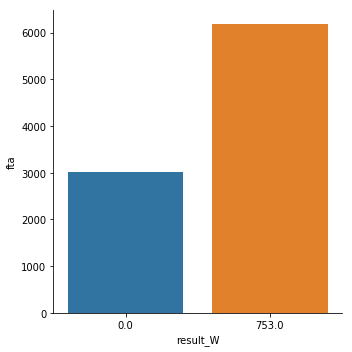

In [204]:
sns.catplot(x="result_W", y='fta', kind='bar',data=graphingtotal)

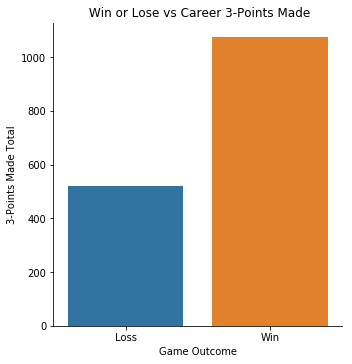

In [230]:
g=sns.catplot(x="result_W", y='three', kind='bar',data=graphingtotal)
plt.title(" Win or Lose vs Career 3-Points Made")
plt.ylabel("3-Points Made Total")
plt.xlabel("Game Outcome")
g.set(xticklabels=["Loss", "Win"])

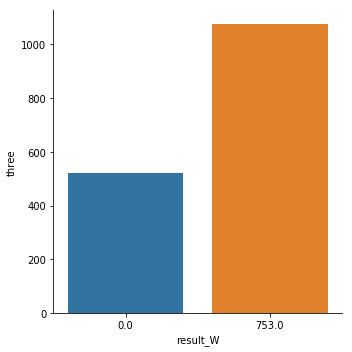

In [205]:
sns.catplot(x="result_W", y='three', kind='bar',data=graphingtotal)

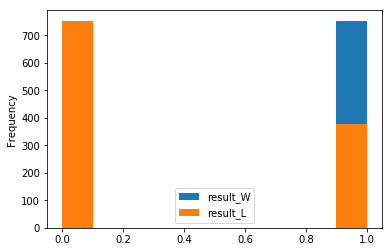

In [150]:
graphinglast.plot.hist(y=['result_W','result_L'], bins=10)

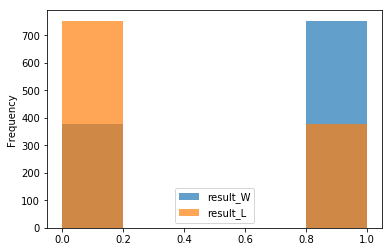

In [153]:
graphinglast.plot.hist(y=['result_W','result_L'], bins=5, alpha=0.7)

In [145]:
graphing2=graphing.sum()

In [146]:
sns.catplot(x="result_W", y='pts', kind='bar',data=graphing2)

TypeError: len() of unsized object

In [111]:
def stacked_bar_plot(col_1, col_2):
    
    groupnew = df.groupby(col_1)[col_2].sum()
    groupnew.plot(kind='bar', stacked='True', figsize=(8,6))
    plt.legend(loc=1)
    plt.xticks(rotation=45)
    plt.show();

    
stack_list = ['pts', 'minus_plus', 'threep', 'fg', 'ft', \
                'trb', 'mp']

for feature in stack_list:
    
    stacked_bar_plot(feature, 'result')

TypeError: Empty 'DataFrame': no numeric data to plot

In [110]:
plotx=group2['result','minus_plus','pts',]

KeyError: ('result', 'minus_plus', 'pts')

In [93]:
group3=df.groupby(['age']).mean()

In [94]:
group3.head()

,game,mp,fg,fga,fgp,three,threeatt,threep,ft,fta,...,orb,drb,trb,ast,stl,blk,tov,pts,game_score,minus_plus
age,,,,,,,,,,,,,,,,,,,,,
18.303,1,42.0,12,20,0.600,0,2,0.0,1,3,...,2,4,6,9,4,0,2,25,24.7,-9
18.304,2,41.0,8,17,0.471,1,5,0.2,4,7,...,2,10,12,8,1,0,7,21,14.7,-3
18.306,3,39.0,3,12,0.250,0,1,0.0,2,2,...,0,4,4,6,2,0,2,8,5.0,-21
18.310,4,41.0,3,11,0.273,0,2,0.0,1,1,...,2,9,11,7,2,3,2,7,11.2,-3
18.312,5,44.0,8,18,0.444,1,2,0.5,6,7,...,0,5,5,3,0,0,7,23,9.0,-7


In [91]:
group4=df.groupby(['result', 'team']).count()

In [92]:
group4.head()

game  date  age  opp   mp   fg  fga  fgp  three  threeatt  ...  \
result team                                                             ...   
L      CLE    300   300  300  300  300  300  300  300    300       300  ...   
       MIA     79    79   79   79   79   79   79   79     79        79  ...   
W      CLE    538   538  538  538  538  538  538  538    538       538  ...   
       MIA    215   215  215  215  215  215  215  215    215       215  ...   

             orb  drb  trb  ast  stl  blk  tov  pts  game_score  minus_plus  
result team                                                                  
L      CLE   300  300  300  300  300  300  300  300         300         300  
       MIA    79   79   79   79   79   79   79   79          79          79  
W      CLE   538  538  538  538  538  538  538  538         538         538  
       MIA   215  215  215  215  215  215  215  215         215         215  

[4 rows x 24 columns]

TypeError: can't multiply sequence by non-int of type 'float'

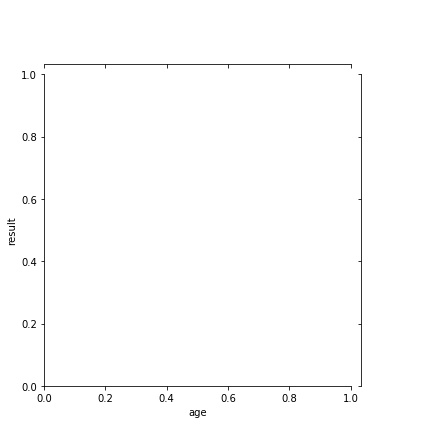

In [52]:
x = df.groupby(col_1)[col_2].value_counts(normalize=True).unstack()
x.plot(kind='bar', stacked='True', figsize=(8,6))
plt.legend(loc=1)
plt.xticks(rotation=45)
plt.show();



In [ ]:
# Create Win/ Loss point distribution 
# Create Win/ Loss plus/minus 
# Create win/ loss age 


In [9]:
X = X.fillna(value=0) #Fill null values
for col in X.columns:
    X[col] = (X[col]-min(X[col]))/ (max(X[col]) - min(X[col])) #subtract the minimum and divide by the range forcing a scale of 0 to 1 for each feature

X.head()

,age,mp,fgp,threep,ftp,fta,trb,ast,stl,blk,tov,pts,game_score,minus_plus,team_MIA
0,0.000000,0.657895,0.645856,0.0,0.333,0.107143,0.315789,0.473684,0.571429,0.0,0.181818,0.379310,0.465291,0.384615,0.0
1,0.000068,0.631579,0.506997,0.2,0.571,0.250000,0.631579,0.421053,0.142857,0.0,0.636364,0.310345,0.277674,0.461538,0.0
2,0.000203,0.578947,0.269107,0.0,1.000,0.071429,0.210526,0.315789,0.285714,0.0,0.181818,0.086207,0.095685,0.230769,0.0
3,0.000474,0.631579,0.293864,0.0,1.000,0.035714,0.578947,0.368421,0.285714,0.6,0.181818,0.068966,0.212008,0.461538,0.0
4,0.000609,0.710526,0.477933,0.5,0.857,0.250000,0.263158,0.157895,0.000000,0.0,0.636364,0.344828,0.170732,0.410256,0.0


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


# Logistic Regression Model 

In [11]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept = False, C = 1e12)
model_log = logreg.fit(X_train, y_train)
model_log

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [12]:
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

In [13]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print('Training Precision: ', precision_score(y_hat_train, y_train))
print('Testing Precision: ', precision_score(y_hat_test, y_test))
print('\n\n')

print('Training Recall: ', recall_score(y_hat_train, y_train))
print('Testing Recall: ', recall_score(y_hat_test, y_test))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_hat_train, y_train))
print('Testing Accuracy: ', accuracy_score(y_hat_test, y_test))
print('\n\n')

print('Training F1-Score: ',f1_score(y_hat_train,y_train))
print('Testing F1-Score: ',f1_score(y_hat_test,y_test))

Training Precision:  0.9414893617021277
Testing Precision:  0.9259259259259259



Training Recall:  0.9030612244897959
Testing Recall:  0.8838383838383839



Training Accuracy:  0.8939929328621908
Testing Accuracy:  0.8692579505300353



Training F1-Score:  0.921875
Testing F1-Score:  0.9043927648578811


In [14]:
from sklearn.metrics import roc_curve, auc

In [26]:
y_score = logreg.fit(X_train, y_train).decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
print('AUC: {}'.format(auc(fpr, tpr)))

AUC: 0.9313857930879208


AUC: 0.9313857930879208


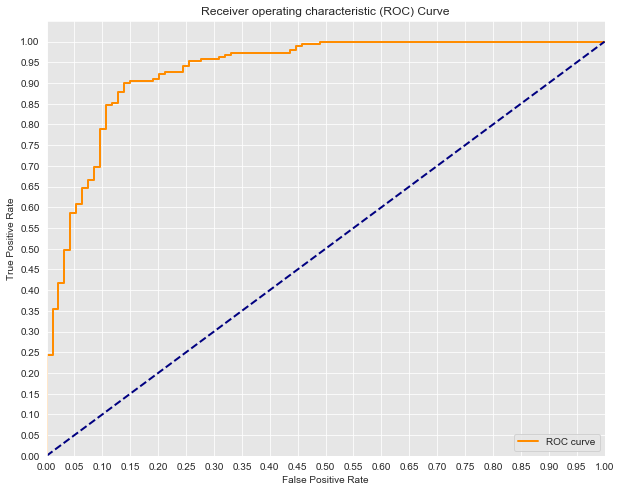

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Seaborns Beautiful Styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Decision Tree Model 

In [39]:
df.head()

,game,date,age,team,opp,result,mp,fg,fga,fgp,...,orb,drb,trb,ast,stl,blk,tov,pts,game_score,minus_plus
0,1,2003-10-29,18.303,CLE,SAC,L,42.0,12,20,0.600,...,2,4,6,9,4,0,2,25,24.7,-9
1,2,2003-10-30,18.304,CLE,PHO,L,41.0,8,17,0.471,...,2,10,12,8,1,0,7,21,14.7,-3
2,3,2003-11-01,18.306,CLE,POR,L,39.0,3,12,0.250,...,0,4,4,6,2,0,2,8,5.0,-21
3,4,2003-11-05,18.310,CLE,DEN,L,41.0,3,11,0.273,...,2,9,11,7,2,3,2,7,11.2,-3
4,5,2003-11-07,18.312,CLE,IND,L,44.0,8,18,0.444,...,0,5,5,3,0,0,7,23,9.0,-7


In [40]:
df.columns


Index(['game', 'date', 'age', 'team', 'opp', 'result', 'mp', 'fg', 'fga',
       'fgp', 'three', 'threeatt', 'threep', 'ft', 'fta', 'ftp', 'orb', 'drb',
       'trb', 'ast', 'stl', 'blk', 'tov', 'pts', 'game_score', 'minus_plus'],
      dtype='object')

In [9]:
x_feats2 = ['age', 'mp', 'fg','fga','fgp','three','threeatt', 'threep', 'ft', 'ftp', 'fta', 'team', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pts', 'game_score', 'minus_plus']
X2 = pd.get_dummies(df[x_feats2], drop_first=True)
# y= df.result

X2.head() 

,age,mp,fg,fga,fgp,three,threeatt,threep,ft,ftp,...,drb,trb,ast,stl,blk,tov,pts,game_score,minus_plus,team_MIA
0,18.303,42.0,12,20,0.600,0,2,0.0,1,0.333,...,4,6,9,4,0,2,25,24.7,-9,0
1,18.304,41.0,8,17,0.471,1,5,0.2,4,0.571,...,10,12,8,1,0,7,21,14.7,-3,0
2,18.306,39.0,3,12,0.250,0,1,0.0,2,1.000,...,4,4,6,2,0,2,8,5.0,-21,0
3,18.310,41.0,3,11,0.273,0,2,0.0,1,1.000,...,9,11,7,2,3,2,7,11.2,-3,0
4,18.312,44.0,8,18,0.444,1,2,0.5,6,0.857,...,5,5,3,0,0,7,23,9.0,-7,0


In [10]:
X2['AtoT'] = X2['ast']/X2['tov']

In [43]:
X2.head()

,age,mp,fg,fga,fgp,three,threeatt,threep,ft,ftp,...,trb,ast,stl,blk,tov,pts,game_score,minus_plus,team_MIA,AtoT
0,18.303,42.0,12,20,0.600,0,2,0.0,1,0.333,...,6,9,4,0,2,25,24.7,-9,0,4.500000
1,18.304,41.0,8,17,0.471,1,5,0.2,4,0.571,...,12,8,1,0,7,21,14.7,-3,0,1.142857
2,18.306,39.0,3,12,0.250,0,1,0.0,2,1.000,...,4,6,2,0,2,8,5.0,-21,0,3.000000
3,18.310,41.0,3,11,0.273,0,2,0.0,1,1.000,...,11,7,2,3,2,7,11.2,-3,0,3.500000
4,18.312,44.0,8,18,0.444,1,2,0.5,6,0.857,...,5,3,0,0,7,23,9.0,-7,0,0.428571


In [11]:
X2 = X2.fillna(value=0)

In [45]:
X2.isnull().sum()

age           0
mp            0
fg            0
fga           0
fgp           0
three         0
threeatt      0
threep        0
ft            0
ftp           0
fta           0
orb           0
drb           0
trb           0
ast           0
stl           0
blk           0
tov           0
pts           0
game_score    0
minus_plus    0
team_MIA      0
AtoT          0
dtype: int64

In [46]:
X2.columns

Index(['age', 'mp', 'fg', 'fga', 'fgp', 'three', 'threeatt', 'threep', 'ft',
       'ftp', 'fta', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pts',
       'game_score', 'minus_plus', 'team_MIA', 'AtoT'],
      dtype='object')

In [12]:
X2['EFG']= ((X2['fg'])+(X2['three']*(.5)))/(X2['fga'])
X2['AtoT'] = X2['ast']/X2['tov']

In [13]:
X2 = X2.fillna(value=0)

In [49]:
X2.isna().sum()

age           0
mp            0
fg            0
fga           0
fgp           0
three         0
threeatt      0
threep        0
ft            0
ftp           0
fta           0
orb           0
drb           0
trb           0
ast           0
stl           0
blk           0
tov           0
pts           0
game_score    0
minus_plus    0
team_MIA      0
AtoT          0
EFG           0
dtype: int64

In [50]:
y.tail()

,W
1127,1
1128,0
1129,1
1130,1
1131,1


In [14]:
X2=X2.replace([np.inf, -np.inf], np.nan)


In [15]:
X2 = X2.fillna(value=0)

In [16]:
X2.max()

age           33.081
mp            55.000
fg            23.000
fga           36.000
fgp            0.929
three          8.000
threeatt      13.000
threep         1.000
ft            24.000
ftp            1.000
fta           28.000
orb            7.000
drb           17.000
trb           19.000
ast           19.000
stl            7.000
blk            5.000
tov           11.000
pts           61.000
game_score    53.200
minus_plus    39.000
team_MIA       1.000
AtoT          13.000
EFG            1.000
dtype: float64

In [17]:
X_train, X_test , y_train, y_test = train_test_split(X2, y, test_size = 0.3, random_state = 10) 

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn import tree 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import pandas as pd 
import numpy as np 

In [56]:
classifier = DecisionTreeClassifier(random_state=42, criterion = "gini", max_depth = 5)  
model=classifier.fit(X_train, y_train) 

In [57]:
y_pred = classifier.predict(X_test)  

In [58]:
# Calculate Accuracy 
acc = accuracy_score(y_test,y_pred) * 100
print("Accuracy is :{0}".format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("\nAUC is :{0}".format(round(roc_auc,2)))

# Create and print a confusion matrix 
# print('\nConfusion Matrix')
# print('----------------')
# pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
# Visualize the tree trained from complete dataset (optional)
# dot_data = StringIO()
# export_graphviz(classifier, out_file=dot_data, filled=True, rounded=True,special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

Accuracy is :87.94117647058823

AUC is :0.85


In [59]:
y_score = logreg.fit(X_train, y_train).decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
# plot_feature_importances(tree_clf)

In [19]:
plot_feature_importances(model)

NameError: name 'model' is not defined

In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [63]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 90  27]
 [ 14 209]]
              precision    recall  f1-score   support

           0       0.87      0.77      0.81       117
           1       0.89      0.94      0.91       223

   micro avg       0.88      0.88      0.88       340
   macro avg       0.88      0.85      0.86       340
weighted avg       0.88      0.88      0.88       340



In [ ]:
# should still do pruning and find ideal hyperparameters for min/max node/leaves using grid-search 

# Random Forest Model 

In [23]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
# import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
# %matplotlib inline

In [24]:
df=pd.read_csv('lebron_career.csv')

In [25]:
df.drop('game', axis=1)
df.date=pd.to_datetime(df['date'])
df['mp'] = df['mp'].astype(str)
df['mp'] = df['mp'].str.replace(':','.')
df['mp'] = df['mp'].astype(float)
df['age'] = df['age'].astype(str)
df['age'] = df['age'].str.replace('-','.')
df['age'] = df['age'].astype(float)
df['result'] = df['result'].str[:1]

In [26]:
x_feats2 = ['age', 'mp', 'fg','fga','fgp','three','threeatt', 'threep', 'ft', 'ftp', 'fta', 'team', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pts', 'game_score', 'minus_plus']
X2 = pd.get_dummies(df[x_feats2], drop_first=True)

In [27]:
X2['EFG']= ((X2['fg'])+(X2['three']*(.5)))/(X2['fga'])
X2['AtoT'] = X2['ast']/X2['tov']

In [28]:
X2=X2.replace([np.inf, -np.inf], np.nan)

In [29]:
X2 = X2.fillna(value=0)

In [30]:
y= pd.get_dummies(df['result'], drop_first=True)

In [9]:
 # testing matplotlib 
# test_list = [1,2,3,4,5,6]
# test_list_2 = [3,4,5,6,7,8]
# plt.bar(test_list, test_list_2)

In [31]:
X_train, X_test , y_train, y_test = train_test_split(X2, y, test_size = 0.3, random_state = 10) 

In [32]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [35]:
forest.score(X_train, y_train)

0.9936868686868687

In [36]:
forest.score(X_test, y_test)

0.8823529411764706

In [37]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

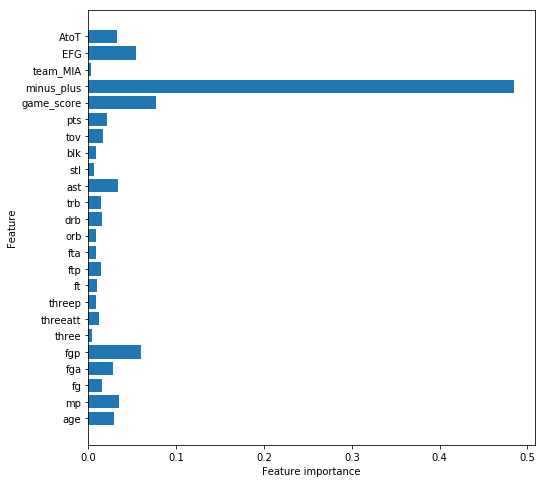

In [20]:
plot_feature_importances(forest)

### Gridsearch for Random Forest Modeling 

In [44]:
X2.columns

Index(['age', 'mp', 'fg', 'fga', 'fgp', 'three', 'threeatt', 'threep', 'ft',
       'ftp', 'fta', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pts',
       'game_score', 'minus_plus', 'team_MIA', 'EFG', 'AtoT'],
      dtype='object')

In [45]:
param_gridforest = {
    "max_depth": [1, 5, 8, 10],
    'max_features': [5, 10, 15, 24],
    'max_leaf_nodes': [5, 10, 20, 40],
    'n_estimators': [ 50, 100, 150, 200],
    'random_state': [10, 42, 50, 65],
}

In [46]:
grid_clf = GridSearchCV(forest, param_gridforest, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X2, y)

best_parameters = grid_clf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
val_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("")
print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

Grid Search found the following optimal parameters: 
max_depth: 1
max_features: 10
max_leaf_nodes: 5
n_estimators: 50
random_state: 65

Training Accuracy: 89.52%
Validation accuracy: 90.0%


# XG boost model 

In [30]:
import pandas as pd
import numpy as np
import xgboost as xgb
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
# %matplotlib inline

In [31]:
# testing matplotlib 
# test_list = [1,2,3,4,5,6]
# test_list_2 = [3,4,5,6,7,8]
# plt.bar(test_list, test_list_2)

In [32]:
df=pd.read_csv('lebron_career.csv')

In [33]:
df.drop('game', axis=1)
df.date=pd.to_datetime(df['date'])
df['mp'] = df['mp'].astype(str)
df['mp'] = df['mp'].str.replace(':','.')
df['mp'] = df['mp'].astype(float)
df['age'] = df['age'].astype(str)
df['age'] = df['age'].str.replace('-','.')
df['age'] = df['age'].astype(float)
df['result'] = df['result'].str[:1]

In [34]:
x_feats2 = ['age', 'mp', 'fg','fga','fgp','three','threeatt', 'threep', 'ft', 'ftp', 'fta', 'team', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pts', 'game_score', 'minus_plus']
X2 = pd.get_dummies(df[x_feats2], drop_first=True)

In [35]:
X2['EFG']= ((X2['fg'])+(X2['three']*(.5)))/(X2['fga'])
X2['AtoT'] = X2['ast']/X2['tov']

In [36]:
X2 = X2.fillna(value=0)

In [37]:
X2=X2.replace([np.inf, -np.inf], np.nan)

In [38]:
X2 = X2.fillna(value=0)

In [39]:
y= pd.get_dummies(df['result'], drop_first=True)

In [40]:
X3=np.array(X2)
y2=np.array(y)

In [23]:
# xgb.DMatrix(X3, label=y)

In [24]:
# dtrain = xgb.DMatrix(X_train, label=y_train)
# dtest = xgb.DMatrix(X_test, label=y_test)

In [41]:
X_train, X_test , y_train, y_test = train_test_split(X3, y2, test_size = 0.3, random_state = 10) 

In [42]:
xclf = xgb.XGBClassifier()
xclf.fit(X_train, y_train)
training_preds = xclf.predict(X_train)
val_preds = xclf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

Training Accuracy: 97.6%
Validation accuracy: 91.47%


In [27]:
# xclf.score(X_train, y_train)

In [28]:
# xclf.score(X_test, y_test)

In [51]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

In [18]:
# testing matplotlib 
# test_list = [1,2,3,4,5,6]
# test_list_2 = [3,4,5,6,7,8]
# plt.bar(test_list, test_list_2)

In [ ]:
# plot_feature_importances(xclf) - kernel dies 

In [16]:
# a=xclf.feature_importances_

In [17]:
# a.shape

(24,)

In [ ]:
# b=a[:1]
# plt.figure(figsize=(8,8))
# plt.barh(b)

In [18]:
# X_train.shape[:1]


(792, 24)

In [ ]:
# n_features = X_train[0]
# plt.figure(figsize=(8,8))
# plt.barh(range(n_features), xclf.feature_importances_, align='center') 
# plt.yticks(np.arange(n_features), X_train.columns.values) 
# plt.xlabel("Feature importance")
# plt.ylabel("Feature")

### Grid search to Tune XG Boost model 

In [49]:
# Results were - Training Accuracy: 91.41% and - Validation accuracy: 93.82%
param_grid = {
    "learning_rate": [1],
    'max_depth': [6],
    'min_child_weight': [10],
    'subsample': [ 0.7],
    'n_estimators': [5, 30, 100, 250],
}

In [50]:
grid_clf = GridSearchCV(xclf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X3, y)

best_parameters = grid_clf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
val_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("")
print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

Grid Search found the following optimal parameters: 
learning_rate: 1
max_depth: 6
min_child_weight: 10
n_estimators: 5
subsample: 0.7

Training Accuracy: 91.41%
Validation accuracy: 93.82%


In [ ]:
# plot_feature_importances(grid_clf) - kernel dies for gridsearched-XGBoost As Well 

In [ ]:
# Trying other params 
param_grid2 = {
    "learning_rate": [.1, .3, .6, .8, 1],
    'max_depth': [1, 2, 3, 4, 5],
    'min_child_weight': [1, 3, 6, 10],
    'subsample': [ 0.7, .9, 1],
    'n_estimators': [5, 30, 100, 300],
}

In [44]:
#Trying with params more within range of default setting of original XG boost model 
grid_clf = GridSearchCV(xclf, param_grid2, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X3, y)

best_parameters = grid_clf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
val_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("")
print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.6
max_depth: 1
min_child_weight: 10
n_estimators: 5
subsample: 0.7

Training Accuracy: 88.76%
Validation accuracy: 90.88%


In [47]:
#Trying other params 
param_grid3 = {
    "learning_rate": [.6, .8, 1],
    'max_depth': [3, 6, 7, 8],
    'min_child_weight': [ 9, 10, 12, 15],
    'subsample': [ 0.2, 0.4, 0.7, 0.9],
    'n_estimators': [5, 100],
}

In [48]:
#Trying with params 3rd time more within range of default setting of original XG boost model 
grid_clf = GridSearchCV(xclf, param_grid3, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X3, y)

best_parameters = grid_clf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
val_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("")
print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.6
max_depth: 3
min_child_weight: 12
n_estimators: 5
subsample: 0.4

Training Accuracy: 89.65%
Validation accuracy: 89.41%
